In [1]:
import pandas as pd
import numpy as np
import random as rn
import matplotlib.pyplot as plt
from faker import Faker
rn.seed = 10

Создание списка из объекта питона
data/index/dtype/name/copy
name - название серии
copy - копирование серии, массива np

In [2]:
a = (54, 45, 0.54, 3)
b = pd.Series(a, dtype='string')
b

0      54
1      45
2    0.54
3       3
dtype: string

Изменение индексов- аля словарь
можно сразу загружать словари

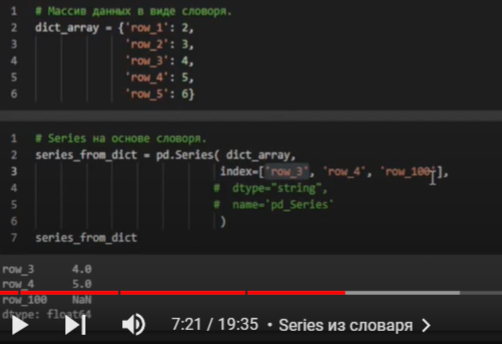

Если для создания серии передается словарь, то в качестве индексов можно отправлять некоторые ключи словаря

In [3]:
rus = ('похожие', 'слова')
en = ('simular', 'words')
translate = pd.Series(rus, en, name='translate')
translate

simular    похожие
words        слова
Name: translate, dtype: object

In [4]:
translate[0], translate['simular']

C:\Users\user\AppData\Local\Temp\ipykernel_3152\2505811497.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  translate[0], translate['simular']


('похожие', 'похожие')

Лайфхук

In [5]:
list('word'), dict(zip(rus, en))

(['w', 'o', 'r', 'd'], {'похожие': 'simular', 'слова': 'words'})

Мат операции над сериями применяются к каждому элементу массива

In [6]:
massiv0 = [rn.randrange(5, 325) for _ in range(10)]
data0 = pd.Series(massiv0)
data0 = data0 + 2
data0.head(5)

0    251
1    287
2      8
3    129
4    118
dtype: int64

Булевая маска

In [7]:
bool_masc = data0 > 325 / 2
data0[bool_masc], max(data0), sorted(data0), set(data0)

(0    251
 1    287
 6    169
 9    223
 dtype: int64,
 287,
 [8, 36, 39, 83, 118, 129, 169, 223, 251, 287],
 {8, 36, 39, 83, 118, 129, 169, 223, 251, 287})

21 21


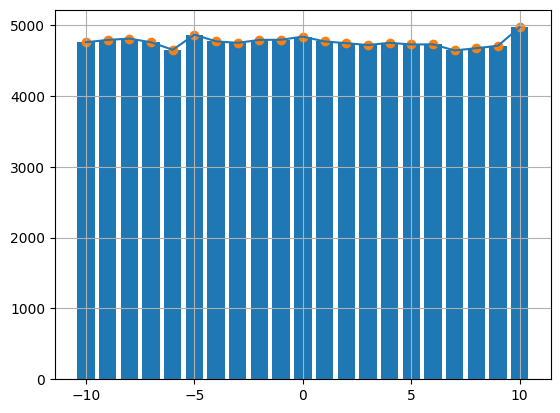

In [8]:
ass = [rn.randint(-10, 10) for _ in range(100000)]
assx = [i for i in range(-10, 11)]
assy = [ass.count(i) for i in assx]
print(len(assy), len(assx))
plt.bar(assx, assy)
plt.scatter(assx, assy)
plt.plot(assx, assy)
# plt.ylim(-3, 3)
plt.grid()

Аттрибутыи и методы серий
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

In [9]:
fake = Faker()
name = pd.Series([fake.first_name() for _ in range(10)])
nums = pd.Series([i for i in range(10)], [rn.randint(-10, 10) for _ in range(10)])

In [10]:
name.values, name.size, name.shape, name.index

(array(['Nicholas', 'Phillip', 'Teresa', 'Peter', 'John', 'Andre',
        'Donald', 'Tyler', 'Cory', 'Jeffrey'], dtype=object),
 10,
 (10,),
 RangeIndex(start=0, stop=10, step=1))

In [11]:
nums, nums.index, nums.name

( 9     0
 -1     1
  10    2
  6     3
 -2     4
 -2     5
 -8     6
 -9     7
  7     8
  9     9
 dtype: int64,
 Index([9, -1, 10, 6, -2, -2, -8, -9, 7, 9], dtype='int64'),
 None)

index - возвращает индексы
size - len
is_unique - возвращает булевое значение если все элементы уникальны

Методы

# Чтение и запись


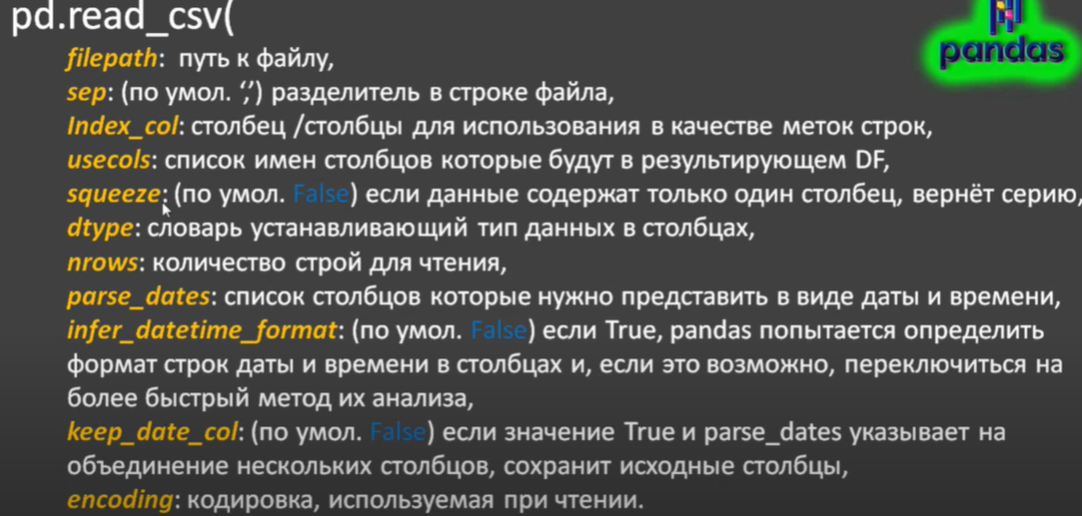

squeze - если сможет поменяет, если нет - ничего страшного

parse_date - можно сразу указать один столбец с датой, а можно объединить несколько столбцов

keep - при спарсивании даты столбцы не удаляются

my_df = read_XXX('path', parse_date=[['year', 'month', 'day'], oter_columns_date, ...]])

my_df = read_XXX('path', parse_date={date_1 = ['year', 'month', 'day'], date_2 = oter_columns_date, ...})

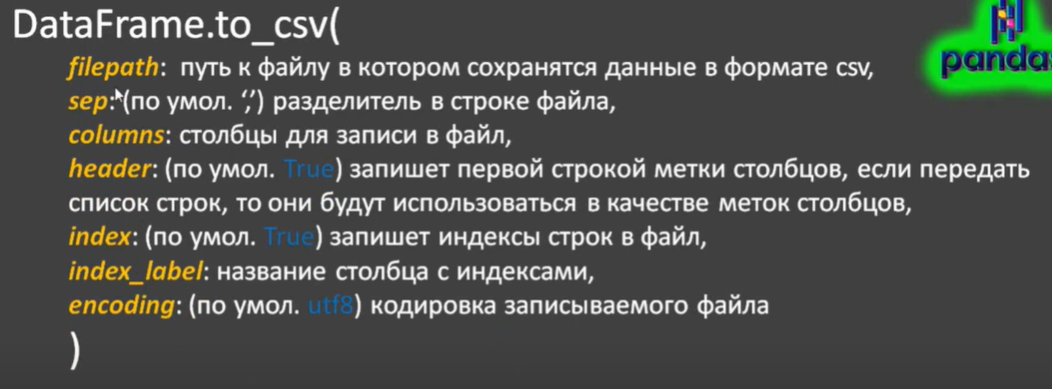

In [12]:
data_fin = pd.read_csv('C:/Users/user/Downloads/for jupyter/Finance_data.csv')
data_fin.head(5)

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


# Индексы

set_index - устанавливает столбец индексом

reset_index - возвращает столбез из индекса

In [13]:
new_df = data_fin.set_index(['gender', 'age'],
                            append=True, # оставляет индекс  
                           )#inplace=True) # - изменяет изходный фрейм      
    
new_df.head(5)

,,,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,Stock_Marktet,Factor,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
,gender,age,,,,,,,,,,,,,,,,,,,,,
0,Female,34,Yes,1,2,5,3,7,6,4,Yes,Returns,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,No,Locking Period,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,Yes,Returns,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,Yes,Returns,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,No,Returns,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


Доступ к дате фрейма

In [14]:
data_fin[['gender', 'age']]
data_fin['new column'] = data_fin['gender']
# del data_fin['new_column']
data_fin[data_fin['age'] > 30].head(5)

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source,new column
0,Female,34,Yes,1,2,5,3,7,6,4,...,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines,Female
8,Male,35,Yes,2,4,7,5,3,1,6,...,Weekly,20%-30%,Equity,Retirement Plan,Capital Appreciation,Fund Diversification,Safe Investment,Fixed Returns,Television,Male
9,Male,31,Yes,1,3,7,4,5,2,6,...,Monthly,30%-40%,Fixed Deposits,Retirement Plan,Capital Appreciation,Fund Diversification,Assured Returns,Fixed Returns,Newspapers and Magazines,Male
10,Female,35,Yes,2,4,7,5,3,1,6,...,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Financial Consultants,Female
25,Female,32,Yes,3,4,7,5,1,2,6,...,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Fixed Returns,Financial Consultants,Female


Класс индексов - нахрен не нужо на практике. Видосер пидр

In [15]:
list_index1 = list('qwerty')
list_index2 = [i for i in range(0, 61, 10)]

index_data1 = pd.Index(list_index1, name='sign')
index_data2 = pd.Index(list_index2, name='numb')

# этот же класс можно использовать и для подготовки названий колонок
index_columns = pd.Index(['col1', 'col2', 'col3'])

In [16]:
def generate_num(st: int, col: int = 1, stre: tuple = (-10, 10)) -> list:
    for _ in range(col):
        return [rn.randrange(stre[0], stre[1]) for _ in range(st)]
        


test_df = pd.DataFrame({'col1': generate_num(6),
                        'col2': generate_num(6),
                        'col3': generate_num(6)},
                        index=index_data1,
                        columns=index_columns)
test_df

,col1,col2,col3
sign,,,
q,-9,6,1
w,-6,-5,-10
e,-2,1,-4
r,2,-6,1
t,-8,-7,-5
y,8,-1,4


In [17]:
test_df.index # получение индексов фрейма / columns

Index(['q', 'w', 'e', 'r', 't', 'y'], dtype='object', name='sign')

In [18]:
test_df.index = generate_num(6) # изменение названий индексов/столбцов
test_df

,col1,col2,col3
-10,-9,6,1
7,-6,-5,-10
8,-2,1,-4
-8,2,-6,1
7,-8,-7,-5
8,8,-1,4


In [19]:
ind = index_data1.to_list

# Индексы

test_df.index # получение индексов фрейма / columns

test_df.index = generate_num(6) # изменение названий индексов/столбцов

ind = index_data1.to_list - преобразование индексов в список

unique() возвращает уникальные индексы

nunique() возвращает число уникальных индексов

is_unique являются ли все уникальными

duplicated - true  при первом вхождении индекса

name - возвращает имя индексов/столбцов

test_df.index.hasnans  - true если в индексе есть пропуски NaN

test_df.index.isna() - возвращает булевый списа в котором где пропуск - False

test_df.index.dropna() - возвращает индекс без пропусков

In [20]:
test_df.rename(columns={'col1': 'col11',     #переименование столбцов
                        'col2': 'col22',     #аргумент - словарь {текущее: новое}
                        'col3': 'col33'}, inplace=True)    #возвращает новый фрейм
                                             #вместо columns можно написать axis=1

test_df.rename(str.upper, axis=1) # передача функции

,COL11,COL22,COL33
-10,-9,6,1
7,-6,-5,-10
8,-2,1,-4
-8,2,-6,1
7,-8,-7,-5
8,8,-1,4


# Мультииндекс

индекс состоящий из нескольких уровней

можно создавать с помощью своего класса

In [21]:
array = [[1, 2, 3, 4], ['a', 'b', 'c', 'd']]
multi_index1 = pd.MultiIndex.from_arrays(array, names=['lvl1', 'lvl2'])
multi_index1

MultiIndex([(1, 'a'),
            (2, 'b'),
            (3, 'c'),
            (4, 'd')],
           names=['lvl1', 'lvl2'])

In [22]:
test_df = pd.DataFrame([generate_num(4) for _ in range(4)],
                      columns=multi_index1)
test_df

lvl1,1,2,3,4
lvl2,a,b,c,d
0,0,-1,-4,8
1,-7,5,-4,3
2,-4,-8,2,9
3,8,7,2,-1


также мультииндекс можно создать с помощью from_product, и спомощью списка кортежей 

свойства и методы мультииндексов

test.index

test.columns

test.index.nlevels - сколько уровней

test.index.levshape - сколько уникальных элементов на каждом уровне 

test.index.names - можно посмотреть имена и их поменять

test.index.set_names([list]) - возвращает измененный мультииндекс

или 

test.index.set_names(new, level=1) - изменяет имя индекса 1-го уровня

test.index.levels - возвращает кортеж с уникальными индексами по уровням

изменять индексы можно как и обычный но отправляем список списков

test.reset_index(list) - возврщает мультииндекс как фрейм

droplevel

# Арифмитические операции

если к фрейму прибавить массив, то сумма пройдет по столбцам, т.е. первый элемент массива прибавится ко всем трочкам первого столбца/

если ложить разные фреймы с разными размерами, получитя большой фрейм, см выравнивание индексов

методы - axis (по умолчанию 1), fill_value - на что запонить если при выравнивании индексов в серии NaN (если в обоих сериях нан, то в результате будет NaN)

add()

sub() - вычетание

div() - деление

mul() - умножение

pow() - возведение в тепень

mod() - остаток от деления

In [23]:
df = pd.DataFrame({'col_1': generate_num(5),
                   'col_2': generate_num(5),
                   'col_3': generate_num(5),
                   'col_4': generate_num(5),
                   'col_5': generate_num(5)},
                   index = ['row_' + str(i) for i in range(1, 6)])
df.iloc[3, 1] = np.nan
df                  
                             

,col_1,col_2,col_3,col_4,col_5
row_1,-9,-9.0,-7,-1,-6
row_2,-9,-2.0,-7,7,4
row_3,-5,-1.0,7,-1,2
row_4,8,NaN,-1,0,-1
row_5,-10,6.0,-1,1,2


In [24]:
df2 = pd.DataFrame({'col_1': generate_num(5),
                   'col_2': generate_num(5),
                   'col_3': generate_num(5)},
                   index = ['row_' + str(i) for i in range(1, 6)])
df2.iloc[3, 1] = np.nan
df2    

,col_1,col_2,col_3
row_1,4,5.0,7
row_2,-8,-1.0,-5
row_3,-5,-9.0,-6
row_4,5,NaN,-9
row_5,-3,-4.0,5


In [25]:
ser = pd.Series(generate_num(5), index=['row_' + str(i) for i in range(1, 6)])
ser[3] = np.nan
ind = list(ser.index)
ind[0] = 'row_10'
ser.index = ind
ser

C:\Users\user\AppData\Local\Temp\ipykernel_3152\3949564382.py:2: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ser[3] = np.nan


row_10     2.0
row_2    -10.0
row_3     -7.0
row_4      NaN
row_5      4.0
dtype: float64

если к фрейму прибавить массив, то сумма пройдет по столбцам, т.е. первый элемент массива прибавится ко всем трочкам первого столбца/

In [26]:
df2.loc['row_2'] + [3 for _ in range(3)],df2 + [3 for _ in range(3)],df2['col_2'] + [3 for _ in range(5)]

(col_1   -5.0
 col_2    2.0
 col_3   -2.0
 Name: row_2, dtype: float64,
        col_1  col_2  col_3
 row_1      7    8.0     10
 row_2     -5    2.0     -2
 row_3     -2   -6.0     -3
 row_4      8    NaN     -6
 row_5      0   -1.0      8,
 row_1    8.0
 row_2    2.0
 row_3   -6.0
 row_4    NaN
 row_5   -1.0
 Name: col_2, dtype: float64)

In [27]:
ser + df.iloc[1] # наны - потому что нет пересечений, т.е col_1 нет в серии и получается NaN+число,а это равно NaN

col_1    NaN
col_2    NaN
col_3    NaN
col_4    NaN
col_5    NaN
row_10   NaN
row_2    NaN
row_3    NaN
row_4    NaN
row_5    NaN
dtype: float64

In [28]:
ser + df['col_1'] 

row_1      NaN
row_10     NaN
row_2    -19.0
row_3    -12.0
row_4      NaN
row_5     -6.0
dtype: float64

In [29]:
df, df.add([5, 4, 3, 2, 1], axis=1), df.add([5, 4, 3, 2, 1], axis=0)

(       col_1  col_2  col_3  col_4  col_5
 row_1     -9   -9.0     -7     -1     -6
 row_2     -9   -2.0     -7      7      4
 row_3     -5   -1.0      7     -1      2
 row_4      8    NaN     -1      0     -1
 row_5    -10    6.0     -1      1      2,
        col_1  col_2  col_3  col_4  col_5
 row_1     -4   -5.0     -4      1     -5
 row_2     -4    2.0     -4      9      5
 row_3      0    3.0     10      1      3
 row_4     13    NaN      2      2      0
 row_5     -5   10.0      2      3      3,
        col_1  col_2  col_3  col_4  col_5
 row_1     -4   -4.0     -2      4     -1
 row_2     -5    2.0     -3     11      8
 row_3     -2    2.0     10      2      5
 row_4     10    NaN      1      2      1
 row_5     -9    7.0      0      2      3)

In [30]:
df.add(ser, axis=0) #сначала происходит выравнивание индексов

,col_1,col_2,col_3,col_4,col_5
row_1,NaN,NaN,NaN,NaN,NaN
row_10,NaN,NaN,NaN,NaN,NaN
row_2,-19.0,-12.0,-17.0,-3.0,-6.0
row_3,-12.0,-8.0,0.0,-8.0,-5.0
row_4,NaN,NaN,NaN,NaN,NaN
row_5,-6.0,10.0,3.0,5.0,6.0


# Операции сравнения

логика такая же как и при оперциях, но при этом возвращаются булевые массивы

при сравнении ерий индекс должны быть одинаковыми

axis

eq ==, ne !=, le <=, lt <, ge >=, dt >

equals - эквивалентные ли фреймы. Нужно чтобы даже порядок был один и тот же

методами можно сравнивать фремы и серии с разными индексами и колонками

Фильтрация данных

фильтрация с помощью bool

нужно использовать битовые операции и сложные условия ззаключать в скобки

~ - не

& - and

| - or

isin([]) - возвращает булевуют таблицу такого же размера как и фрейм с булевыми значениями где true - если есть в переданных значений

query() - возвращает строки по введеному условию. Чтобы в запросе использовать переменную, нужно вплотную перед переменной написать @ - @i


In [31]:
dic = {'age': generate_num(5, stre=(0, 55)),
       'name': [fake.first_name() for _ in range(5)],
       'auto': [True, True, False, False, True]}
df = pd.DataFrame(dic)
df

,age,name,auto
0,16,Kristin,True
1,51,Laura,True
2,9,Cynthia,False
3,30,David,False
4,15,Jeff,True


In [32]:
df[ [True, False, True, True, False] ], df[df['auto']] #строки по булевой маске

(   age     name   auto
 0   16  Kristin   True
 2    9  Cynthia  False
 3   30    David  False,
    age     name  auto
 0   16  Kristin  True
 1   51    Laura  True
 4   15     Jeff  True)

In [33]:
df[(df['auto']) | (df['age'] > 18)]

,age,name,auto
0,16,Kristin,True
1,51,Laura,True
3,30,David,False
4,15,Jeff,True


In [34]:
df.isin([i for i in range(18)] + ['Sarah', 'Cameron'])

,age,name,auto
0,True,False,True
1,False,False,True
2,True,False,True
3,False,False,True
4,True,False,True


In [35]:
df[ df.isin([i for i in range(18)] + ['Sarah', 'Cameron']) ] #применили предыдующую булевую маску

,age,name,auto
0,16.0,NaN,True
1,NaN,NaN,True
2,9.0,NaN,False
3,NaN,NaN,False
4,15.0,NaN,True


In [36]:
df.query('not `auto` and age > 10') # обратные кавычки - ё - используются при латинице или при пробелах в названиях. МОжно использовать все что и в if

,age,name,auto
3,30,David,False


# Пропуски в данных

dropna() - axis, how=any/all - при all удалит строки/столбцы где все элементы пропуски, subset - удаляет строки и столбцы по котором мы указали
subset - удаляем строки,то передаем столбцы и наоборот (связано с axis), inplace

fillna() - меняет пробелы на указанные значения

isna - булевая маска всего фрейма,тру - где стоит нан

notna - то же что и isna но флаги наоборот


In [37]:
df.insert(2, 'money', generate_num(5, stre=(1000, 100000)))


In [38]:
df.insert(3, 'mark_auto', [np.nan] * 5)
df

,age,name,money,mark_auto,auto
0,16,Kristin,27293,NaN,True
1,51,Laura,98885,NaN,True
2,9,Cynthia,65022,NaN,False
3,30,David,86656,NaN,False
4,15,Jeff,13624,NaN,True


In [39]:
df.loc[2, 'auto'] = np.nan
df

C:\Users\user\AppData\Local\Temp\ipykernel_3152\3996867459.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[2, 'auto'] = np.nan


,age,name,money,mark_auto,auto
0,16,Kristin,27293,NaN,True
1,51,Laura,98885,NaN,True
2,9,Cynthia,65022,NaN,NaN
3,30,David,86656,NaN,False
4,15,Jeff,13624,NaN,True


In [40]:
df[ ['age', 'name', 'auto'] ].dropna() 

,age,name,auto
0,16,Kristin,True
1,51,Laura,True
3,30,David,False
4,15,Jeff,True


In [41]:
df.dropna(),df.dropna(axis=1), df.dropna(axis=1, how='all')

(Empty DataFrame
 Columns: [age, name, money, mark_auto, auto]
 Index: [],
    age     name  money
 0   16  Kristin  27293
 1   51    Laura  98885
 2    9  Cynthia  65022
 3   30    David  86656
 4   15     Jeff  13624,
    age     name  money   auto
 0   16  Kristin  27293   True
 1   51    Laura  98885   True
 2    9  Cynthia  65022    NaN
 3   30    David  86656  False
 4   15     Jeff  13624   True)

In [42]:
df.dropna(subset=['auto']), df.dropna(subset=[1, 3, 4], axis=1)

(   age     name  money  mark_auto   auto
 0   16  Kristin  27293        NaN   True
 1   51    Laura  98885        NaN   True
 3   30    David  86656        NaN  False
 4   15     Jeff  13624        NaN   True,
    age     name  money   auto
 0   16  Kristin  27293   True
 1   51    Laura  98885   True
 2    9  Cynthia  65022    NaN
 3   30    David  86656  False
 4   15     Jeff  13624   True)

In [43]:
df.fillna(value={'auto':'БМП',
                 'mark_auto': 'бомжарка какая то',
                 'empty': 'сказано же пусто!'},
          inplace=False)

,age,name,money,mark_auto,auto
0,16,Kristin,27293,бомжарка какая то,True
1,51,Laura,98885,бомжарка какая то,True
2,9,Cynthia,65022,бомжарка какая то,БМП
3,30,David,86656,бомжарка какая то,False
4,15,Jeff,13624,бомжарка какая то,True


In [44]:
df['auto'].isna()

0    False
1    False
2     True
3    False
4    False
Name: auto, dtype: bool

In [45]:
df[ ~ df['auto'].isna() ] #~... - не+битовая маска

,age,name,money,mark_auto,auto
0,16,Kristin,27293,NaN,True
1,51,Laura,98885,NaN,True
3,30,David,86656,NaN,False
4,15,Jeff,13624,NaN,True


# Удаление строк и столбцов

drop

astype

In [46]:
df

,age,name,money,mark_auto,auto
0,16,Kristin,27293,NaN,True
1,51,Laura,98885,NaN,True
2,9,Cynthia,65022,NaN,NaN
3,30,David,86656,NaN,False
4,15,Jeff,13624,NaN,True


In [47]:
# df.drop(['empty'], axis=1),str('\n'),df.drop([1, 2]),str('\n'), df.drop(index=[1, 3], columns=['mark_auto'])

# Методы iat at iloc loc

iat([]) - доступ к 1 элементу через [индекс строки, индекс столюбца]

iloc - то же но по срезу, можно менять значения

df.iloc[и стр, и стл] - одиночные элементы

df.iloc[[список и стр], [список и стл]] - списки

df.iloc[и стр:и стр, и стл: и стл] - срезы

df.iloc[[булевые и стр], [булевые и стл]] - булевые маски

at, loc - аналог но по названиям, даже срезы можно делать

df.loc[row1, row2] - вытаскиваем две строки

df.loc[:, [col1, col2]] - вытаскиваем два столбца

df.loc[row1:row10] - крайние значения включены

df.loc[ df[row1] > 10] = 0 - можно добавлять условия.Можно присваивать списки, серии, фреймы совпадающие по размеру

In [48]:
df


,age,name,money,mark_auto,auto
0,16,Kristin,27293,NaN,True
1,51,Laura,98885,NaN,True
2,9,Cynthia,65022,NaN,NaN
3,30,David,86656,NaN,False
4,15,Jeff,13624,NaN,True


In [49]:
df.loc[:, ['money', 'age']] = df[['age', 'money']].to_numpy() #поменять столбцы местами только так
df

,age,name,money,mark_auto,auto
0,27293,Kristin,16,NaN,True
1,98885,Laura,51,NaN,True
2,65022,Cynthia,9,NaN,NaN
3,86656,David,30,NaN,False
4,13624,Jeff,15,NaN,True


In [50]:
df.loc[:, ['money', 'age']] = df[['age', 'money']].to_numpy() #поменять столбцы местами только так
df.loc[1:4] = df.loc[4:1:-1].to_numpy()
df

,age,name,money,mark_auto,auto
0,16,Kristin,27293,NaN,True
1,15,Jeff,13624,NaN,True
2,30,David,86656,NaN,False
3,9,Cynthia,65022,NaN,NaN
4,51,Laura,98885,NaN,True


# unique,nunique, value_counts(), sort_values()

value_counts() - сколько раз строка встречается в df, dropna=False - считает с пропусками

sort_values() - сортировка по столбцу/столбцам; na_position - пропуски будут вверху

In [51]:
df

,age,name,money,mark_auto,auto
0,16,Kristin,27293,NaN,True
1,15,Jeff,13624,NaN,True
2,30,David,86656,NaN,False
3,9,Cynthia,65022,NaN,NaN
4,51,Laura,98885,NaN,True


In [52]:
df.dropna(axis=1).value_counts() # не смотрит на строки с пропусками

age  name     money
9    Cynthia  65022    1
15   Jeff     13624    1
16   Kristin  27293    1
30   David    86656    1
51   Laura    98885    1
Name: count, dtype: int64

In [53]:
df.value_counts(['age', 'name']) # смотрит на совпадения только по указаным столбцам

age  name   
9    Cynthia    1
15   Jeff       1
16   Kristin    1
30   David      1
51   Laura      1
Name: count, dtype: int64

In [54]:
df.value_counts('name', normalize=True) * 100 # в скольки случаях встречается то или иное ептеть

name
Cynthia    20.0
David      20.0
Jeff       20.0
Kristin    20.0
Laura      20.0
Name: proportion, dtype: float64

# apply - свои функции к фреймам

Применяем пользовательские функции к сериям и фреймам

df.apply(func, axis=0, raw=False, result_type=False, *args, **forgot) - в функцию передаются серии

raw - False - отправляется серия, True - отправляется массив нампи

по умолчанию отправляет функции колонки

df.ser(func, *args, **forgot) - в функцию передаются элементы серии

df.rolling(3, step=2).agg({'exp': ['mean', 'sum', 'min', 'max']})

In [55]:
df


,age,name,money,mark_auto,auto
0,16,Kristin,27293,NaN,True
1,15,Jeff,13624,NaN,True
2,30,David,86656,NaN,False
3,9,Cynthia,65022,NaN,NaN
4,51,Laura,98885,NaN,True


In [56]:
def func(series):
    return (series ** 2) if series.dtype == 'int64' else (series) # не забывай  что у серий есть имя

df.apply(func)

,age,name,money,mark_auto,auto
0,256,Kristin,744907849,NaN,True
1,225,Jeff,185613376,NaN,True
2,900,David,7509262336,NaN,False
3,81,Cynthia,4227860484,NaN,NaN
4,2601,Laura,9778243225,NaN,True


In [57]:
dic = {'name': ['Ф1 И1', 'Ф2 И2', 'Ф3 И3 О3', 'Ф4 И4', 'Ф5 И6'],
       'age': generate_num(5)}

df = pd.DataFrame(dic)
df

,name,age
0,Ф1 И1,2
1,Ф2 И2,8
2,Ф3 И3 О3,-8
3,Ф4 И4,2
4,Ф5 И6,4


In [142]:
# принимается серия, через str мы разбиваем её элементы а индексом 0 указываем что мы присваиваем списочек

def my_func(series):
    my_lst = series.str.split()[0] #str позволяет применять методы строк
    # print(series.str.split())
    if len(my_lst) == 2: my_lst.append(np.nan)

    # print(my_lst)
    # print()
    return my_lst

In [143]:
df[['First_name', 'Last_name', 'patronymic']] = df[['name']].apply(my_func, axis=1, result_type='expand') # если две скобки то считается за датафрейм
df
#result_type - позволяет преобразовать вернувшиеся списки в 3 столбца

KeyError: "None of [Index(['name'], dtype='object')] are in the [columns]"

In [60]:
def get_patronymic(element):
    name = element.split()
    return name[-1] if len(name) == 3 else np.nan

In [61]:
df['name'].apply(get_patronymic) #тут передается серия

0    NaN
1    NaN
2     О3
3    NaN
4    NaN
Name: name, dtype: object

# agg - агрегирование данных

df.agg(func, axis)
    

In [62]:
df = pd.DataFrame({'col_1': generate_num(5),
                   'col_2': generate_num(5),
                   'col_3': generate_num(5),
                   'col_4': generate_num(5),
                   'col_5': generate_num(5)},
                   index = ['row_' + str(i) for i in range(1, 6)])

In [63]:
df.agg('min', axis=0) # или без скобок

col_1   -7
col_2   -9
col_3   -6
col_4   -6
col_5   -1
dtype: int64

In [64]:
df.agg({'col_1': [np.min, np.sum],
        'col_3': 'mean'})

C:\Users\user\AppData\Local\Temp\ipykernel_3152\2021514449.py:1: FutureWarning: The provided callable <function amin at 0x0000021574372950> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.agg({'col_1': [np.min, np.sum],
C:\Users\user\AppData\Local\Temp\ipykernel_3152\2021514449.py:1: FutureWarning: The provided callable <function sum at 0x0000021574371F30> is currently using Series.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.agg({'col_1': [np.min, np.sum],


,col_1,col_3
amin,-7.0,NaN
sum,-2.0,NaN
mean,NaN,-1.4


In [65]:
# можно также сделать свои имена для строк
# имя=(столб, функ)
df.agg( min_col_1=('col_1', 'min'), max_col_2=('col_2', np.max))

C:\Users\user\AppData\Local\Temp\ipykernel_3152\4248734295.py:3: FutureWarning: The provided callable <function amax at 0x00000215743727A0> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.agg( min_col_1=('col_1', 'min'), max_col_2=('col_2', np.max))


,col_1,col_2
min_col_1,-7.0,NaN
max_col_2,NaN,5.0


# groupby - группировка данных

In [66]:
num = 7
num2 = 15

names = ['name_' + str(i) for i in range(num)]
cities = ['citi_' + str(i) for i in range(num)]

df = pd.DataFrame({'name': [names[rn.randint(0, num- 1)] for _ in range(num + num2)],
                   'city': [cities[rn.randint(0, num- 1)] for _ in range(num + num2)],
                   'exp': generate_num(num+num2, stre=(0, 10))})
df.loc[2, 'city'] = np.nan 

In [67]:
list(df.groupby('name')) # возвращает итератор

[('name_1',
        name    city  exp
  1   name_1  citi_0    3
  12  name_1  citi_1    3
  13  name_1  citi_5    0
  19  name_1  citi_0    2
  21  name_1  citi_0    4),
 ('name_2',
       name    city  exp
  5  name_2  citi_2    8),
 ('name_3',
        name    city  exp
  2   name_3     NaN    0
  4   name_3  citi_6    0
  7   name_3  citi_1    9
  11  name_3  citi_0    8
  14  name_3  citi_2    7
  15  name_3  citi_6    2),
 ('name_4',
        name    city  exp
  0   name_4  citi_1    4
  6   name_4  citi_5    1
  10  name_4  citi_4    1
  16  name_4  citi_4    0),
 ('name_5',
        name    city  exp
  17  name_5  citi_6    3
  20  name_5  citi_4    4),
 ('name_6',
        name    city  exp
  3   name_6  citi_0    6
  8   name_6  citi_4    4
  9   name_6  citi_0    7
  18  name_6  citi_1    1)]

In [68]:
df.groupby(['name', 'city'], dropna=False, as_index=False).agg(np.sum)

C:\Users\user\AppData\Local\Temp\ipykernel_3152\3096397698.py:1: FutureWarning: The provided callable <function sum at 0x0000021574371F30> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby(['name', 'city'], dropna=False, as_index=False).agg(np.sum)


,name,city,exp
0,name_1,citi_0,9
1,name_1,citi_1,3
2,name_1,citi_5,0
3,name_2,citi_2,8
4,name_3,citi_0,8
5,name_3,citi_1,9
6,name_3,citi_2,7
7,name_3,citi_6,2
8,name_3,NaN,0
9,name_4,citi_1,4


In [69]:
 df.groupby('name').sum()

,city,exp
name,,
name_1,citi_0citi_1citi_5citi_0citi_0,12
name_2,citi_2,8
name_3,citi_6citi_1citi_0citi_2citi_6,26
name_4,citi_1citi_5citi_4citi_4,6
name_5,citi_6citi_4,7
name_6,citi_0citi_4citi_0citi_1,18


In [70]:
df.groupby('name', dropna=False, as_index=False).agg(np.sum)

C:\Users\user\AppData\Local\Temp\ipykernel_3152\2494108514.py:1: FutureWarning: The provided callable <function sum at 0x0000021574371F30> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby('name', dropna=False, as_index=False).agg(np.sum)


,name,city,exp
0,name_1,citi_0citi_1citi_5citi_0citi_0,12
1,name_2,citi_2,8
2,name_3,citi_6citi_1citi_0citi_2citi_6,26
3,name_4,citi_1citi_5citi_4citi_4,6
4,name_5,citi_6citi_4,7
5,name_6,citi_0citi_4citi_0citi_1,18


In [71]:
df.groupby('name')['exp'].sum()

name
name_1    12
name_2     8
name_3    26
name_4     6
name_5     7
name_6    18
Name: exp, dtype: int64

## переименовка столбца - rename
df.rename(columns={'title1': 'title2'})

In [72]:
df.groupby('name').agg({'city': 'count',
                        'exp': ['sum', 'max']})

city exp    
       count sum max
name                
name_1     5  12   4
name_2     1   8   8
name_3     5  26   9
name_4     4   6   4
name_5     2   7   4
name_6     4  18   7

In [73]:
df.groupby('name')['city'].nunique()

name
name_1    3
name_2    1
name_3    4
name_4    3
name_5    2
name_6    3
Name: city, dtype: int64

In [74]:
for i in df.groupby('name'): print(i)

('name_1',       name    city  exp
1   name_1  citi_0    3
12  name_1  citi_1    3
13  name_1  citi_5    0
19  name_1  citi_0    2
21  name_1  citi_0    4)
('name_2',      name    city  exp
5  name_2  citi_2    8)
('name_3',       name    city  exp
2   name_3     NaN    0
4   name_3  citi_6    0
7   name_3  citi_1    9
11  name_3  citi_0    8
14  name_3  citi_2    7
15  name_3  citi_6    2)
('name_4',       name    city  exp
0   name_4  citi_1    4
6   name_4  citi_5    1
10  name_4  citi_4    1
16  name_4  citi_4    0)
('name_5',       name    city  exp
17  name_5  citi_6    3
20  name_5  citi_4    4)
('name_6',       name    city  exp
3   name_6  citi_0    6
8   name_6  citi_4    4
9   name_6  citi_0    7
18  name_6  citi_1    1)


# Объединение данных

Прасти,мне лень 

concat - объединение фреймов
df1.merge(df2, how, on=[], lef_on, right_on)
how - к правому левый прикреплять или наоборот/по тем что есть в обоих/по всем элементам
on - по какому столбцу - можно по нескольким
l/r_on -для разных названий столбцов

# Скользящие окна - rolling

df.rolling(n, min_perionds, step) 

Возвращает всевозможные скользящие окна

min_periods - минимальное количество элементов при котором будет возвращаться массив, фрейм??

In [75]:
df

,name,city,exp
0,name_4,citi_1,4
1,name_1,citi_0,3
2,name_3,NaN,0
3,name_6,citi_0,6
4,name_3,citi_6,0
5,name_2,citi_2,8
6,name_4,citi_5,1
7,name_3,citi_1,9
8,name_6,citi_4,4
9,name_6,citi_0,7


In [79]:
for win in df.rolling(3):
    print(win)

     name    city  exp
0  name_4  citi_1    4
     name    city  exp
0  name_4  citi_1    4
1  name_1  citi_0    3
     name    city  exp
0  name_4  citi_1    4
1  name_1  citi_0    3
2  name_3     NaN    0
     name    city  exp
1  name_1  citi_0    3
2  name_3     NaN    0
3  name_6  citi_0    6
     name    city  exp
2  name_3     NaN    0
3  name_6  citi_0    6
4  name_3  citi_6    0
     name    city  exp
3  name_6  citi_0    6
4  name_3  citi_6    0
5  name_2  citi_2    8
     name    city  exp
4  name_3  citi_6    0
5  name_2  citi_2    8
6  name_4  citi_5    1
     name    city  exp
5  name_2  citi_2    8
6  name_4  citi_5    1
7  name_3  citi_1    9
     name    city  exp
6  name_4  citi_5    1
7  name_3  citi_1    9
8  name_6  citi_4    4
     name    city  exp
7  name_3  citi_1    9
8  name_6  citi_4    4
9  name_6  citi_0    7
      name    city  exp
8   name_6  citi_4    4
9   name_6  citi_0    7
10  name_4  citi_4    1
      name    city  exp
9   name_6  citi_0    7
10  n

In [81]:
df['exp'].rolling(3).mean()

0      NaN
1      NaN
2      7.0
3      9.0
4      6.0
5     14.0
6      9.0
7     18.0
8     14.0
9     20.0
10    12.0
11    16.0
12    12.0
13    11.0
14    10.0
15     9.0
16     9.0
17     5.0
18     4.0
19     6.0
20     7.0
21    10.0
Name: exp, dtype: float64

In [90]:
df['exp'].rolling(3, min_periods=1).mean()

0     4.000000
1     3.500000
2     2.333333
3     3.000000
4     2.000000
5     4.666667
6     3.000000
7     6.000000
8     4.666667
9     6.666667
10    4.000000
11    5.333333
12    4.000000
13    3.666667
14    3.333333
15    3.000000
16    3.000000
17    1.666667
18    1.333333
19    2.000000
20    2.333333
21    3.333333
Name: exp, dtype: float64

In [91]:
df['exp'].rolling(3, step=2).mean()

0          NaN
2     2.333333
4     2.000000
6     3.000000
8     4.666667
10    4.000000
12    4.000000
14    3.333333
16    3.000000
18    1.333333
20    2.333333
Name: exp, dtype: float64

In [94]:
df.rolling(3, step=2).agg({'exp': ['mean', 'sum', 'min', 'max']})

exp                
        mean   sum  min  max
0        NaN   NaN  NaN  NaN
2   2.333333   7.0  0.0  4.0
4   2.000000   6.0  0.0  6.0
6   3.000000   9.0  0.0  8.0
8   4.666667  14.0  1.0  9.0
10  4.000000  12.0  1.0  7.0
12  4.000000  12.0  1.0  8.0
14  3.333333  10.0  0.0  7.0
16  3.000000   9.0  0.0  7.0
18  1.333333   4.0  0.0  3.0
20  2.333333   7.0  1.0  4.0

# Даты

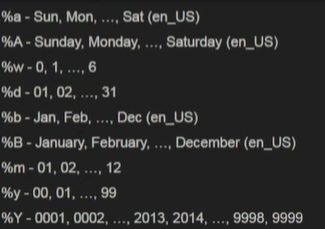

In [103]:
def generate_date(n=10):
    return ([f'{rn.randint(2000, 2035)}-{rn.randint(1, 12)}-{rn.randint(1, 30)}' for i in range(n)])

In [107]:
df = pd.DataFrame({'id': generate_num(10),
                   'date': generate_date()})

In [108]:
df

,id,date
0,2,2031-8-13
1,-5,2000-7-9
2,-10,2005-1-2
3,-9,2026-1-15
4,3,2017-3-8
5,-7,2024-11-5
6,-2,2032-8-13
7,-3,2006-10-26
8,9,2029-4-7
9,-1,2034-5-29


In [110]:
df.astype({'date': 'datetime64[ns]'})

,id,date
0,2,2031-08-13
1,-5,2000-07-09
2,-10,2005-01-02
3,-9,2026-01-15
4,3,2017-03-08
5,-7,2024-11-05
6,-2,2032-08-13
7,-3,2006-10-26
8,9,2029-04-07
9,-1,2034-05-29


In [119]:
pd.to_datetime('2034-05-29', format='%Y-%m-%d') # можно передать как строку так и серию e rjn

Timestamp('2034-05-29 00:00:00')

In [123]:
df = df.astype({'date': 'datetime64[ns]'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      10 non-null     int64         
 1   date    10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 288.0 bytes


## Аттрибуты и методы

In [126]:
df['day_name'] = df['date'].dt.day_name()
df['day'] = df['date'].dt.day #de - аксесос ил ключ доступа/ month, weekday - день недели в числовом формате 0-6
df

,id,date,day,day_name
0,2,2031-08-13,13,Wednesday
1,-5,2000-07-09,9,Sunday
2,-10,2005-01-02,2,Sunday
3,-9,2026-01-15,15,Thursday
4,3,2017-03-08,8,Wednesday
5,-7,2024-11-05,5,Tuesday
6,-2,2032-08-13,13,Friday
7,-3,2006-10-26,26,Thursday
8,9,2029-04-07,7,Saturday
9,-1,2034-05-29,29,Monday


In [133]:
df.loc[:, 'date'].dt.day_name(), df.loc[8, 'date'].day_name() 

(0    Wednesday
 1       Sunday
 2       Sunday
 3     Thursday
 4    Wednesday
 5      Tuesday
 6       Friday
 7     Thursday
 8     Saturday
 9       Monday
 Name: date, dtype: object,
 'Saturday')

In [135]:
pd.date_range('2023-03-10', periods=10) # freq- периодичность - D W M Y

DatetimeIndex(['2023-03-10', '2023-03-11', '2023-03-12', '2023-03-13',
               '2023-03-14', '2023-03-15', '2023-03-16', '2023-03-17',
               '2023-03-18', '2023-03-19'],
              dtype='datetime64[ns]', freq='D')

In [136]:
pd.date_range('2023-03-10', periods=10, freq='W') # через запятую можно указать вторую дату-конец

DatetimeIndex(['2023-03-12', '2023-03-19', '2023-03-26', '2023-04-02',
               '2023-04-09', '2023-04-16', '2023-04-23', '2023-04-30',
               '2023-05-07', '2023-05-14'],
              dtype='datetime64[ns]', freq='W-SUN')

In [138]:
pd.date_range('2023-03-10', '2023-03-15', periods=10,) # диапазон разделен на 10 точек

DatetimeIndex(['2023-03-10 00:00:00', '2023-03-10 13:20:00',
               '2023-03-11 02:40:00', '2023-03-11 16:00:00',
               '2023-03-12 05:20:00', '2023-03-12 18:40:00',
               '2023-03-13 08:00:00', '2023-03-13 21:20:00',
               '2023-03-14 10:40:00', '2023-03-15 00:00:00'],
              dtype='datetime64[ns]', freq=None)

# Дополнения

## Свойства доступа

Свойства доступа или же аксесоры нужны только когда а вход илет серия, если же смы работаем с типом
данных напрямую, то их указывать не нужно

## Сортировка

df.sort_values(by=['Country'], ascending=False)

## Добавить
добавление строк